In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150

In [9]:
def edwards_wilkinson(N, L):
    """
    This function simulates the Edwards-Wilkinson model using a Monte Carlo scheme for deposition and relaxation of particles. A random spot on the lattice is chosen at each iteration. To optimize the relaxation, the neighbours are checked for eligibility instead of first depositing and then checking. 
    An eligible neighbour is one whose height is strictly lesser than the chosen point and is the minimum. If there isn't 1 then the particle is deposited at the chosen point. If there are more than 1 then a point is chosen randomly.
    At each iteration the interfacial width is also calculated.

    Parameters
    ----------
    N: number of iterations or the time for which the simulation will run
    L: size of the lattice in each direction

    Returns
    -------
    W: 1d array
        Square of the interfacial width at each iteration
    """

    h = np.zeros((L, L), dtype = int) # initialize the height array to a L x L lattice
    W = np.zeros(N) # initialize interfacial width array of length N

    for i in range(N):
        x = int((L) * np.random.random()) # random x coordinate
        y = int((L) * np.random.random()) # random y coordinate

        relax_site = relaxation(x, y, h, L) # checking neighbours to see if there are any that the particle can relax to

        if relax_site == None:
            # if there are no neighbours then the particle is deposited at the chosen site
            h[x, y] += 1
        else:
            # if there are then the particle relaxes to the selected neighbour
            x_rel, y_rel = relax_site
            h[x_rel, y_rel] += 1

        W[i] = np.mean(h ** 2) - np.mean(h) ** 2 # interfacial width at iteration i

    return W

def relaxation(x, y, h, L):
    """
    This function checks the neighbours of a point selected during a run of the edwards_wilkinson function and makes a list of eligible neighbours.

    Parameters
    ----------
    x, y: the coordinates on the lattice chosen randomly
    h: 2D array of heights at different points on the lattice
    L: size of the lattice in each direction

    Returns
    -------
    (x, y): tuple
        A particular neighbour selected by calling update_neighbours function
    """
    neighbour = [] # empty list to store eligible neighbours

    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = (x + dx) % L, (y + dy) % L # coordinates of neighbours accounting for boundary conditions

        if h[nx, ny] < h[x, y]:
            # neighbour is eligible for relaxation only if its height is lesser than the chosen point
            neighbour.append((nx, ny)) # update list of neighbours

    return update_neighbours(neighbour, h) # choose a particular neighbour 

def update_neighbours(neighbours, h):
    """
    This function chooses a particular neighbour for the particle to relax to

    Parameters
    ----------
    neighbours: list of eligible neighbours for relaxation
    h: 2D array of heights at different points on the lattice

    Returns
    -------
    (x, y): tuple
        A particular neighbour to relax to
    None: if no eligible neighbour
    """

    if not neighbours:
        # if there are no eligible neighbours then no need to update the coordinates for relaxation
        return None

    heights = [h[x, y] for x, y in neighbours] # list of heights of each eligible neighbour
    min_height = min(heights)
    min_coords = [coord for coord, height in zip(neighbours, heights) if height == min_height] # list of neighbours with the minimum height

    return min_coords[int(len(min_coords)*np.random.random())] # returns a random coordinate if more than 1 but only the 1 if not more than 1 in the list


def edwards_wilkinson_avg(N, L, num_runs):
    """
    Runs the Edwards-Wilkinson simulation multiple times and computes the average of these multiple runs over all the runs to get an average interfacial width for a particular lattice size.

    Parameters
    ----------
    N: the number steps or the time for which each simulation will run for
    L: size of the lattice in each direction
    num_runs: number of independent simulations to run

    Returns
    -------
    W_avg: 1D array
        Average of the square of the interfacial width of num_runs number of simulations of the Edwards-Wilkinson model
    """
    
    W_multiple = np.zeros((num_runs, N)) # initialize the array to store square of W(t) for each simulation

    for i in range(num_runs):
        W_multiple[i] = edwards_wilkinson(N, L) # compute W(t) for each simulation
    
    W_avg = np.mean(W_multiple, axis = 0) # compute the average over all the simulations

    return W_avg

def plotting(t, L, W, num_runs):
    plt.plot(t, W)
    plt.xlabel("Number of layers (t)")
    plt.ylabel(r"$W^2(t)$")
    plt.title(f"L = {L}, t = {int(t[-1] + 1)}, Runs = {num_runs}")
    plt.show()

The following cell has been converted to raw so that it is not executed when the entire file is run at once. The data used to make the plots has been saved in .csv files before to prevent the code from running for too long which it does to generate new data. 

In [10]:
t_10, W_10 = np.loadtxt("./lattice_size_10.csv", delimiter = ",", skiprows = 1, unpack = True)
t_20, W_20 = np.loadtxt("./lattice_size_20.csv", delimiter = ",", skiprows = 1, unpack = True)
t_30, W_30 = np.loadtxt("./lattice_size_30.csv", delimiter = ",", skiprows = 1, unpack = True)
t_40, W_40 = np.loadtxt("./lattice_size_40.csv", delimiter = ",", skiprows = 1, unpack = True)
t_50, W_50 = np.loadtxt("./lattice_size_50.csv", delimiter = ",", skiprows = 1, unpack = True)

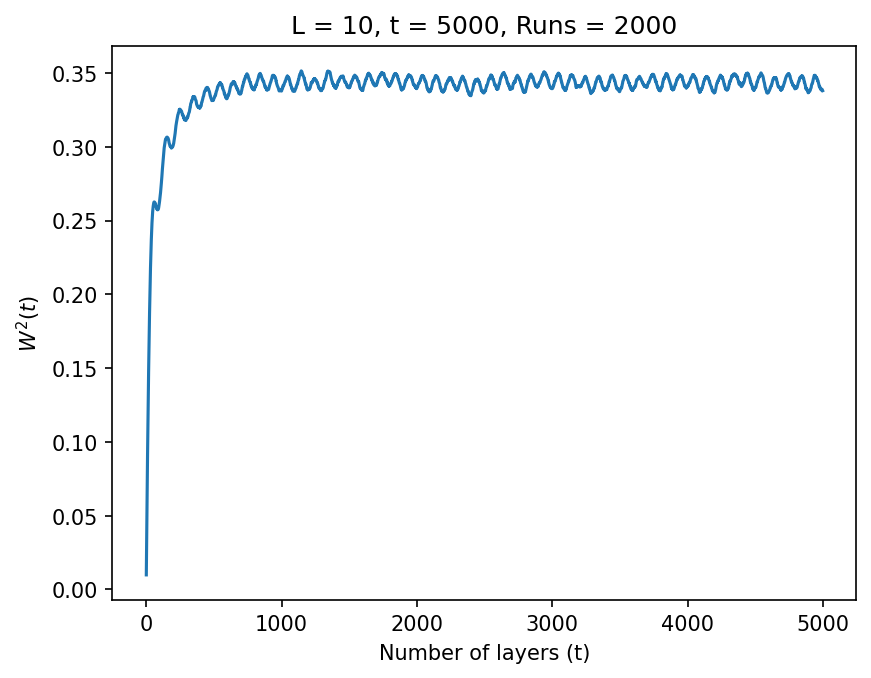

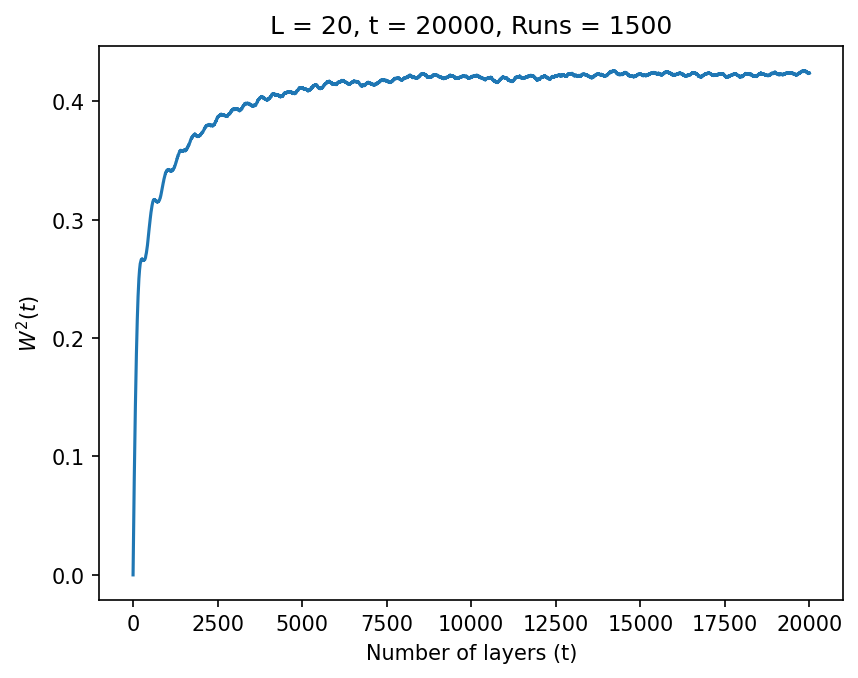

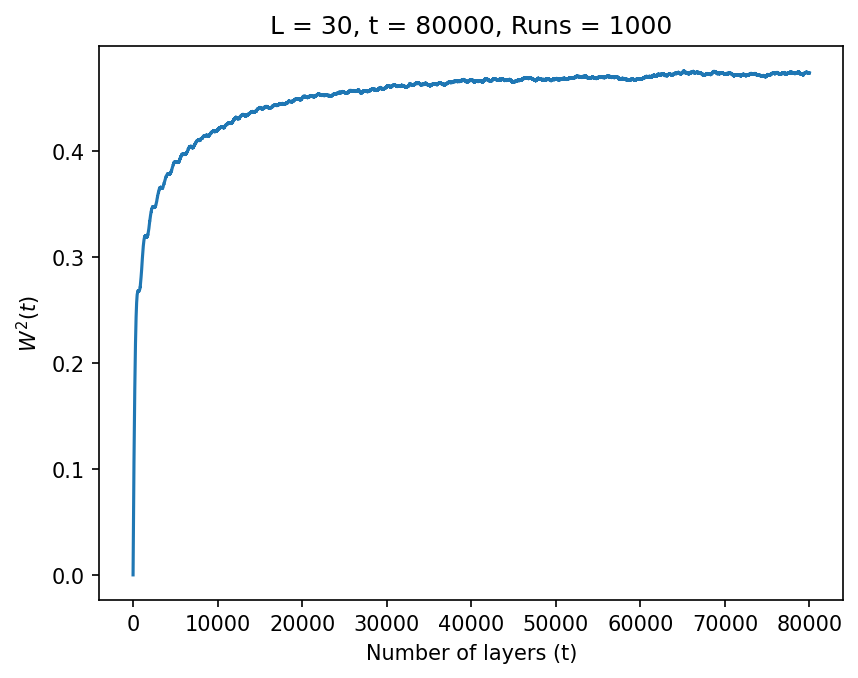

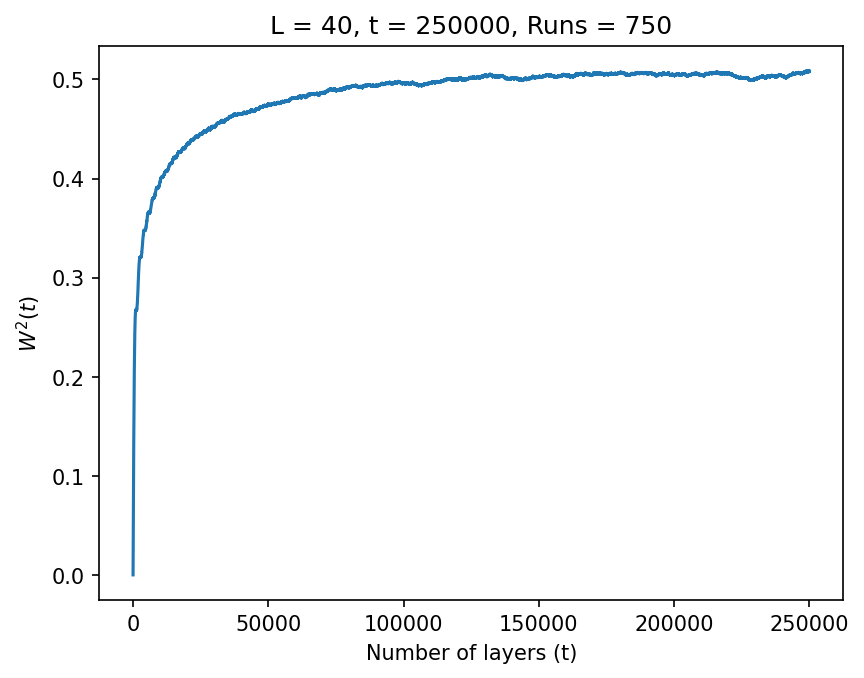

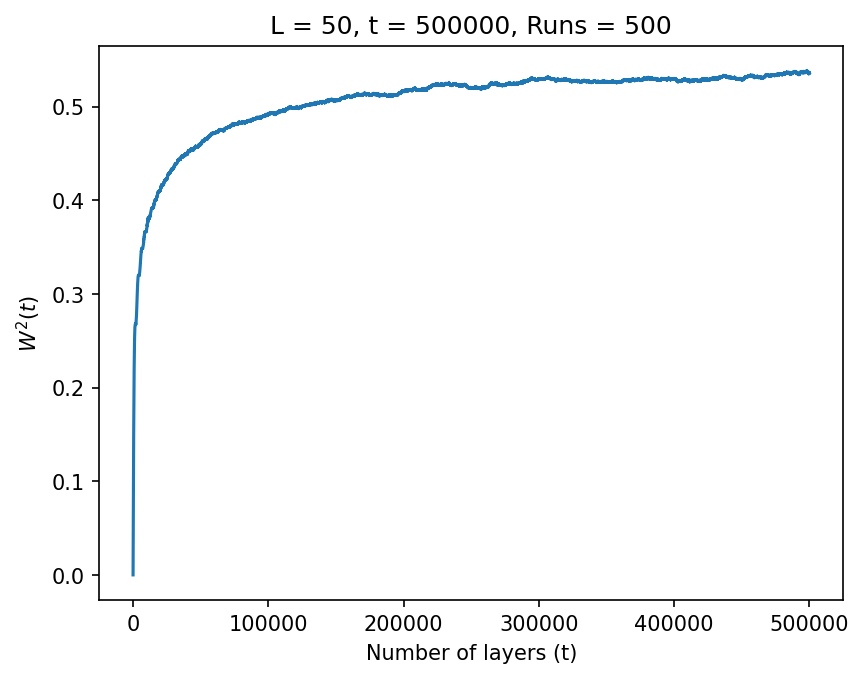

In [11]:
plotting(t_10, 10, W_10, 2000)
plotting(t_20, 20, W_20, 1500)
plotting(t_30, 30, W_30, 1000)
plotting(t_40, 40, W_40, 750)
plotting(t_50, 50, W_50, 500)